In [1]:
import urllib

base_url = "http://ichart.finance.yahoo.com/table.csv?s="
def make_url(ticker_symbol):
    return base_url + ticker_symbol

In [2]:
output_path = "/Users/vakilp/Documents/StockInvestingExperiments"
def make_filename(ticker_symbol, directory="S&P"):
    return output_path + "/" + directory + "/" + ticker_symbol + ".csv"

def pull_historical_data(ticker_symbol, directory="S&P"):
    try:
        urllib.urlretrieve(make_url(ticker_symbol), make_filename(ticker_symbol, directory))
    except urllib.ContentTooShortError as e:
        outfile = open(make_filename(ticker_symbol, directory), "w")
        outfile.write(e.content)
        outfile.close()

In [3]:
pull_historical_data('ATEN')

In [4]:
from pandas.io.data import DataReader
from datetime import datetime

In [5]:
DataReader?

In [6]:
goog = DataReader("GOOG","yahoo")

In [7]:
goog

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 389 entries, 2014-03-27 00:00:00 to 2015-10-09 00:00:00
Data columns (total 6 columns):
Open         389  non-null values
High         389  non-null values
Low          389  non-null values
Close        389  non-null values
Volume       389  non-null values
Adj Close    389  non-null values
dtypes: float64(5), int64(1)

In [8]:
import matplotlib.pyplot as plt
import numpy as np

In [9]:
plt.plot(goog.High)

In [10]:
%matplotlib inline

In [11]:
goog.T

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, Open to Adj Close
Columns: 389 entries, 2014-03-27 00:00:00 to 2015-10-09 00:00:00
dtypes: float64(389)

In [12]:
goog.at

In [13]:
goog.axes

[<class 'pandas.tseries.index.DatetimeIndex'>
[2014-03-27 00:00:00, ..., 2015-10-09 00:00:00]
Length: 389, Freq: None, Timezone: None,
 Index([u'Open', u'High', u'Low', u'Close', u'Volume', u'Adj Close'], dtype=object)]

All the above commands are using Pandas module for python....still dont know how to plot against time yet. Another option to look at is Yahoo's finance [package](https://pypi.python.org/pypi/yahoo-finance/1.1.4)

In [14]:
goog?

In [15]:
goog.T

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, Open to Adj Close
Columns: 389 entries, 2014-03-27 00:00:00 to 2015-10-09 00:00:00
dtypes: float64(389)

In [16]:
goog.High

Date
2014-03-27    568.002570
2014-03-28    566.432590
2014-03-31    567.002574
2014-04-01    568.452595
2014-04-02    604.832763
2014-04-03    587.282679
2014-04-04    577.772650
2014-04-07    548.482483
2014-04-08    555.002500
2014-04-09    565.372554
2014-04-10    565.002582
2014-04-11    540.002440
2014-04-14    544.102429
2014-04-15    538.452473
2014-04-16    557.002492
...
2015-09-21    636.489990
2015-09-22    627.549988
2015-09-23    628.929993
2015-09-24    627.320007
2015-09-25    629.770020
2015-09-28    614.604980
2015-09-29    605.000000
2015-09-30    608.760010
2015-10-01    612.090027
2015-10-02    627.340027
2015-10-05    643.010010
2015-10-06    649.250000
2015-10-07    650.609009
2015-10-08    644.450012
2015-10-09    645.989990
Name: High, Length: 389, dtype: float64

In [17]:
goog

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 389 entries, 2014-03-27 00:00:00 to 2015-10-09 00:00:00
Data columns (total 6 columns):
Open         389  non-null values
High         389  non-null values
Low          389  non-null values
Close        389  non-null values
Volume       389  non-null values
Adj Close    389  non-null values
dtypes: float64(5), int64(1)

In [18]:
goog.columns

Index([u'Open', u'High', u'Low', u'Close', u'Volume', u'Adj Close'], dtype=object)

In [19]:
goog.plot.im_self

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 389 entries, 2014-03-27 00:00:00 to 2015-10-09 00:00:00
Data columns (total 6 columns):
Open         389  non-null values
High         389  non-null values
Low          389  non-null values
Close        389  non-null values
Volume       389  non-null values
Adj Close    389  non-null values
dtypes: float64(5), int64(1)

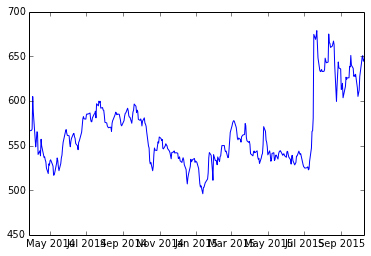

In [20]:
plt.plot(goog.index,goog['High']);

In [21]:
%matplotlib qt

In [22]:
plt.plot(goog.index,goog['High']);

In [23]:
plt.plot(goog.index,goog['Low']);

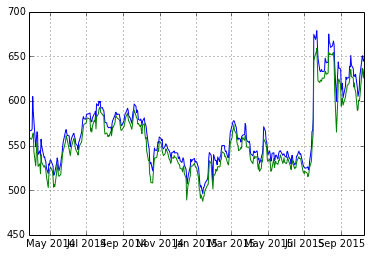

In [24]:
%matplotlib inline
plt.plot(goog.index,goog['High'],goog.index,goog['Low'])
plt.grid()

In [25]:
goog.High[0]

568.00256999999999

In [26]:
a=[];
for i in range(1,len(goog)):
    if(goog.High[i]<goog.High[i-1]):
        a.append(i)

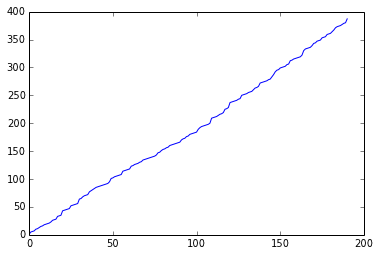

In [27]:
plt.plot(a)

In [28]:
a[0:10]

[1, 5, 6, 7, 10, 11, 13, 15, 16, 18]

In [29]:
b=[];
for i in range(1,len(goog)):
    if(goog.High[i]<=goog.High[i-1]):
        b.append(i)

In [30]:
b[0:10]

[1, 5, 6, 7, 10, 11, 13, 15, 16, 18]

In [31]:
len(a)
len(b)

191

In [32]:
len(a)

191

In [33]:
len(b)

191

In [34]:
a=np.array(a)
b=np.array(b)

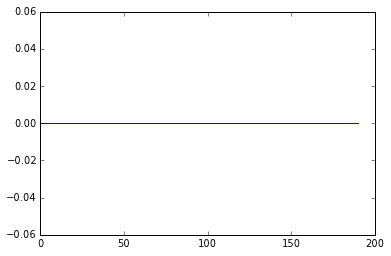

In [35]:
plt.plot(a-b)

So both the outputs wheter I have <= or < are the same for this set of data

# Experiment with Drawing Darvas Box on Google Data

In [36]:
c=[];
for i in range(1,len(goog)):
    if((goog.High[i]<=goog.High[i-1]) and (goog.Low[i]>=goog.Low[i-1])):
        c.append(i)

In [37]:
len(c)

38

In [38]:
a_diff = np.diff(a)

In [39]:
%matplotlib qt

In [40]:
plt.plot(a_diff)

In [41]:
idx = 0;
d = []
for i in range(1,len(goog)):
    if(goog.High[i]<=goog.High[i-1]):
        idx = idx + 1;
    else:
        idx = 0;
    if idx==3:
        d.append(i)

In [42]:
len(d)

27

In [43]:
np.transpose(b)

array([  1,   5,   6,   7,  10,  11,  13,  15,  16,  18,  19,  20,  21,
        23,  26,  27,  28,  33,  34,  35,  43,  44,  45,  46,  47,  52,
        53,  54,  55,  56,  64,  65,  68,  70,  71,  72,  77,  79,  81,
        83,  85,  86,  87,  88,  89,  90,  91,  92,  95, 101, 102, 104,
       105, 106, 107, 108, 114, 115, 116, 117, 118, 123, 124, 126, 127,
       128, 130, 131, 134, 135, 136, 137, 138, 139, 140, 141, 143, 147,
       148, 151, 153, 154, 156, 157, 160, 161, 162, 163, 164, 165, 166,
       170, 172, 173, 176, 177, 180, 181, 182, 183, 184, 189, 192, 194,
       195, 196, 197, 198, 200, 209, 210, 211, 212, 214, 216, 217, 219,
       225, 226, 228, 237, 238, 239, 240, 241, 243, 244, 250, 251, 252,
       253, 255, 256, 257, 260, 263, 264, 266, 272, 273, 274, 275, 276,
       278, 279, 283, 287, 292, 295, 296, 299, 300, 301, 302, 305, 306,
       312, 313, 315, 316, 317, 318, 319, 322, 330, 333, 334, 335, 336,
       339, 343, 344, 347, 348, 349, 353, 354, 355, 359, 360, 36

In [44]:
goog.High[4:7]

Date
2014-04-02    604.832763
2014-04-03    587.282679
2014-04-04    577.772650
Name: High, dtype: float64

In [45]:
np.transpose(d)

array([  7,  20,  28,  35,  45,  54,  72,  87, 106, 116, 128, 136, 162,
       182, 196, 211, 239, 252, 257, 274, 301, 317, 335, 349, 355, 361, 375])

In [46]:
goog.High[17:20]

Date
2014-04-22    537.232391
2014-04-23    533.872408
2014-04-24    531.652452
Name: High, dtype: float64

In [47]:
goog.High[8]

555.00250000000005

In [48]:
goog.Low[4:7]

Date
2014-04-02    562.192568
2014-04-03    564.132581
2014-04-04    543.002488
Name: Low, dtype: float64

In [49]:
class box(object):
    high = []
    low = []

box1 = box()

In [50]:
box1.high.append(300)

In [51]:
box1.high

[300]

In [52]:
xx = goog.High[4:7]
xx.max()

604.832763

In [53]:
class box(object):
    high = []
    low = []

box1 = box()
idx = 0;
d = []
index = 0;
for i in range(1,len(goog)):
    if(goog.High[i]<=goog.High[i-1]):
        idx = idx + 1;
    else:
        idx = 0;
    if idx==3:
        d.append(i)
        high_vals = goog.High[i-3:i]
        low_vals = goog.Low[i-3:i]
        box1.high.append(high_vals.max())
        box1.low.append(low_vals.min())

In [54]:
box1

In [55]:
box1.high

[604.832763,
 537.23239100000001,
 534.00240300000007,
 536.07241099999999,
 567.84258499999999,
 563.60250199999996,
 586.43263100000001,
 592.50268300000005,
 585.23868200000004,
 591.77271500000006,
 589.63269100000002,
 581.00263899999993,
 551.94247300000006,
 536.33246299999996,
 532.60238400000003,
 542.17245300000002,
 577.91262099999994,
 574.59260300000005,
 554.71252100000004,
 571.14259000000004,
 543.5,
 540.90002400000003,
 678.64001500000006,
 674.90002400000003,
 667.0,
 643.59002699999996,
 650.90002400000003]

In [56]:
len(box1.high)

27

So, the good thing here is that number of elements in box1.high is same as we expect

In [57]:
len(box1.low)

27

In [58]:
np.argmin(goog.Low[4:7])

2

In [59]:
goog.Low[4:7]

Date
2014-04-02    562.192568
2014-04-03    564.132581
2014-04-04    543.002488
Name: Low, dtype: float64

In [60]:
class box(object):
    high = []
    low = []
    date_high = []
    date_low = []

box1 = box()
idx = 0;
d = []
index = 0;
for i in range(1,len(goog)):
    if(goog.High[i]<=goog.High[i-1]):
        idx = idx + 1;
    else:
        idx = 0;
    if idx==3:
        d.append(i)
        high_vals = goog.High[i-3:i]
        low_vals = goog.Low[i-3:i]
        box1.high.append(high_vals.max())
        box1.low.append(low_vals.min())
        box1.date_high.append(goog.index[i-3])
        box1.date_low.append(goog.index[i-3+np.argmin(low_vals)])
        
high = np.array(box1.high)
low = np.array(box1.low)
date_high = np.array(box1.date_high)
date_low = np.array(box1.date_low)

In [61]:
plt.plot(date_high,high,'o',goog.index,goog.High,date_low,low,'ro',goog.index,goog.Low);

In [62]:
import matplotlib.patches as patches

So, clearly the rectangle is not working yet. Need to work that out

In [63]:
from matplotlib.patches import FancyBboxPatch

def draw_bbox(ax, bb):
    # boxstyle=square with pad=0, i.e. bbox itself.
    p_bbox = FancyBboxPatch((bb.xmin, bb.ymin),
                            abs(bb.width), abs(bb.height),
                            boxstyle="square,pad=0.",
                            ec="k", fc="none", zorder=10.,
                            )
    ax.add_patch(p_bbox)

In [64]:
import matplotlib.transforms as mtransforms

bb = mtransforms.Bbox([[0.3, 0.4], [0.7, 0.6]])
ax = plt.subplot(111)


In [65]:
draw_bbox(ax,bb)

In [66]:
plt.draw()

In [67]:
plt.plot(date_high,high,'o',goog.index,goog.High,date_low,low,'ro',goog.index,goog.Low);

In [68]:
plt.clf()
plt.plot(date_high,high,'o',goog.index,goog.High,date_low,low,'ro',goog.index,goog.Low);

In [69]:
plt.close()
plt.plot(date_high,high,'o',goog.index,goog.High,date_low,low,'ro',goog.index,goog.Low);

In [70]:
plt.subplot(111)
plt.plot(date_high,high,'o',goog.index,goog.High,date_low,low,'ro',goog.index,goog.Low);
plt.draw()

In [71]:
box1

Things to figure out about plotting:

1. How to close/clf a plot successfully so that I can draw a new plot?
2. How to get current axes for a given plot?
3. How to do hold on and hold off?

In [72]:
%matplotlib inline

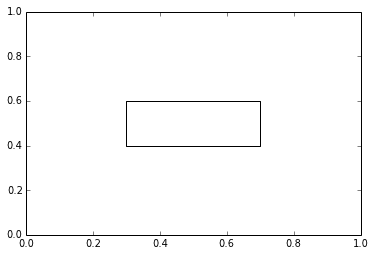

In [73]:
bb = mtransforms.Bbox([[0.3, 0.4], [0.7, 0.6]])
ax = plt.subplot(111)
draw_bbox(ax,bb)

In [74]:
bb.corners

<bound method Bbox.corners of Bbox('array([[ 0.3,  0.4],\n       [ 0.7,  0.6]])')>

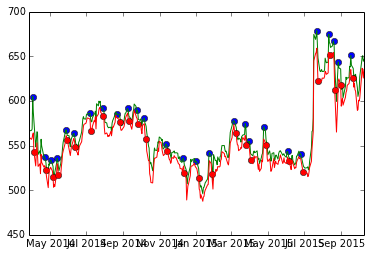

In [75]:
ax = plt.subplot(111)
plt.plot(date_high,high,'o',goog.index,goog.High,date_low,low,'ro',goog.index,goog.Low);
draw_bbox(ax,bb)

In [76]:
%matplotlib qt

In [77]:
ax = plt.subplot(111)
plt.plot(date_high,high,'o',goog.index,goog.High,date_low,low,'ro',goog.index,goog.Low);
draw_bbox(ax,bb)

In [78]:
bb = mtransforms.Bbox([[box1.date_high[1], box1.high[1]], [box1.date_low[1], box1.low[1]]])

TypeError: float() argument must be a string or a number

In [79]:
box1.date_high[1]

Timestamp('2014-04-22 00:00:00', tz=None)

In [80]:
datetime.now()

datetime.datetime(2015, 10, 9, 23, 45, 43, 772256)

In [81]:
datetime.ctime?

In [82]:
datetime.ctime(datetime.now())

'Fri Oct  9 23:45:44 2015'

In [83]:
datetime.ctime(box1.date_high[1])

'Tue Apr 22 00:00:00 2014'

In [84]:
import matplotlib.dates as mdates

In [85]:
mdates.date2num(datetime.fromtimestamp(box1.high[1]))

719162.7978846341

In [86]:
mdates.num2date(719162.7978846341)

datetime.datetime(1969, 12, 31, 19, 8, 57, 232387, tzinfo=<matplotlib.dates._UTC object at 0x10d995e90>)

In [87]:
datetime.timetuple(box1.date_high[1])

time.struct_time(tm_year=2014, tm_mon=4, tm_mday=22, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=1, tm_yday=112, tm_isdst=-1)

In [88]:
datetime.fromtimestamp(box1.high[1])

datetime.datetime(1969, 12, 31, 19, 8, 57, 232391)

In [89]:
datetime.fromtimestamp(1)

datetime.datetime(1969, 12, 31, 19, 0, 1)

In [90]:
mdates.datestr2num(datetime.ctime(box1.date_high[1]))

735345.0

In [91]:
mdates.num2date(735345)

datetime.datetime(2014, 4, 22, 0, 0, tzinfo=<matplotlib.dates._UTC object at 0x10d995e90>)

In [92]:
mdates.datestr2num(datetime.ctime(box1.date_high[]))

SyntaxError: invalid syntax (<ipython-input-92-d81b0cbb140a>, line 1)

In [93]:
x = box1.date_high[1]

In [94]:
x.to_datetime()

datetime.datetime(2014, 4, 22, 0, 0)

In [95]:
mdates.date2num(x.to_datetime())

735345.0

In [96]:
mdates.num2date(mdates.date2num(x.to_datetime()))

datetime.datetime(2014, 4, 22, 0, 0, tzinfo=<matplotlib.dates._UTC object at 0x10d995e90>)

## Time Stamps and Drawing Rectangles

The output of the read from finance.yahoo.com is *timestamp* class. To work with *rectangles*, I need x values that indicate time. The *rectangles* and *bboxes* work only with numbers. So, I need to convert the *timestamp* I have into a number. The way to do is as follows:

1. Pick out a *timestamp* from the list that I form from box1
2. The *timestamp* itself has a function *to_datetime()* that needs to be used to convert from *timestamp* type to 
3. *MATPLOTLIB* has a module called *dates* that allows for converting *datetime* type into a *number*

In [97]:
x_high = box1.date_high[1]

In [98]:
x_high = x_high.to_datetime()

In [99]:
x_high

datetime.datetime(2014, 4, 22, 0, 0)

In [100]:
mdates.date2num(x_high)

735345.0

In [101]:
x_low = box1.date_low[1]

In [102]:
x_low = x_low.to_datetime()

In [103]:
mdates.date2num(x_low)

735347.0

In [104]:
box1.low[1]
box1.high[1]

537.23239100000001

In [105]:
bb = mtransforms.Bbox([[np.float(x_high), np.float(box1.low[1])], [np.float(x_low), np.float(box1.high[1])]])
ax = plt.subplot(111)
draw_bbox(ax,bb)

TypeError: float() argument must be a string or a number

In [106]:
type(box1.low[1])

numpy.float64

In [107]:
type(np.float(box1.low[1]))

float

In [108]:
type(x_high)

datetime.datetime

In [109]:
x_low = mdates.date2num(x_low)
x_high = mdates.date2num(x_high)

In [ ]:
bb = mtransforms.Bbox([[np.float(x_high), np.float(box1.low[1])], [np.float(x_low), np.float(box1.high[1])]])
ax = plt.subplot(111)
draw_bbox(ax,bb)

In [ ]:
plt.show()

In [ ]:
%matplotlib inline
draw_bbox(ax,bb)

In [ ]:
bb

In [ ]:
plt.show()

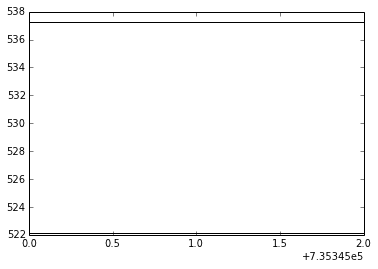

In [134]:
ax=plt.subplot(111)
bb = mtransforms.Bbox([[0.3,1.4],[0.4,1.5]])
bb = mtransforms.Bbox([[np.float(x_high), np.float(box1.low[1])], [np.float(x_low), np.float(box1.high[1])]])

draw_bbox(ax,bb)
ax.autoscale()

$$x = \sqrt{a^2+b^2}$$